In [1]:
import pandas as pd
import sys
import os
from sentence_transformers import SentenceTransformer
import umap
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz

In [2]:
df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/all_tweets.csv',lineterminator='\n')
df = df[~df.text.str.match('^RT @')]
print(df.shape)
df.head()

(2522188, 4)


id                 created_at  \
0  836574925620137984  2017-02-28 13:52:59+00:00   
1  836909877062742016  2017-03-01 12:03:58+00:00   
2  836942635650646019  2017-03-01 14:14:08+00:00   
3  837615430508380160  2017-03-03 10:47:35+00:00   
4  837653127843221504  2017-03-03 13:17:23+00:00   

                                                text           author_id  
0  Langsam spricht es sich rum: Zuviel Dünger&amp...  836553428042141697  
1  Wir SPDler aus dem Bundestag und die BayernSPD...  836553428042141697  
2  @MartinSchulz positioniert sich zur Landwirtsc...  836553428042141697  
3  #Flächenfraß &amp; #Steuergeldverschwendung: B...  836553428042141697  
4  Wenn das #Tierwohllabel-Gestochere des @BMEL s...  836553428042141697

In [3]:
author_df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/all_parliamentarians.csv').rename(columns={"id":"author_id"})
print(author_df.shape)
author_df.head()

(2368, 15)


Nachname         Vorname                       Fraktion    Twitter-Name  \
0      Ahrens          Sandra                            CDU   @sandraAhrens   
1      Aulepp  Sascha Karolin                            SPD             NaN   
2  Averwerser          Yvonne                            CDU    @Yaverwerser   
3        Beck           Peter  Liberal-Konservative Reformer             NaN   
4      Bensch          Rainer                            CDU   @BenschRainer   

   region Name, Vorname Vorname Nachname        handle   party parltype  \
0  Bremen           NaN              NaN  sandraAhrens  CDUCSU     Land   
1  Bremen           NaN              NaN           NaN     SPD     Land   
2  Bremen           NaN              NaN   Yaverwerser  CDUCSU     Land   
3  Bremen           NaN              NaN           NaN   other     Land   
4  Bremen           NaN              NaN  BenschRainer  CDUCSU     Land   

   author_id  person__id person__in_parlperiod seat_region_name   lcasehandle  
0        NaN         NaN                   NaN              NaN  sandraahrens  
1        NaN         NaN                   NaN              NaN           NaN  
2        NaN         NaN                   NaN              NaN   yaverwerser  
3        NaN         NaN                   NaN              NaN           NaN  
4        NaN         NaN                   NaN              NaN  benschrainer

In [4]:
df = df.merge(author_df[['author_id','region','party','parltype']],how="left")
print(df.shape)
df.head()

(2522188, 7)


id                 created_at  \
0  836574925620137984  2017-02-28 13:52:59+00:00   
1  836909877062742016  2017-03-01 12:03:58+00:00   
2  836942635650646019  2017-03-01 14:14:08+00:00   
3  837615430508380160  2017-03-03 10:47:35+00:00   
4  837653127843221504  2017-03-03 13:17:23+00:00   

                                                text           author_id  \
0  Langsam spricht es sich rum: Zuviel Dünger&amp...  836553428042141697   
1  Wir SPDler aus dem Bundestag und die BayernSPD...  836553428042141697   
2  @MartinSchulz positioniert sich zur Landwirtsc...  836553428042141697   
3  #Flächenfraß &amp; #Steuergeldverschwendung: B...  836553428042141697   
4  Wenn das #Tierwohllabel-Gestochere des @BMEL s...  836553428042141697   

  region party parltype  
0    NaN   NaN      NaN  
1    NaN   NaN      NaN  
2    NaN   NaN      NaN  
3    NaN   NaN      NaN  
4    NaN   NaN      NaN

In [5]:
df = df[pd.notna(df['party'])]
df = df[df['region']=="Bund"]
df['party'] = df['party'].str.upper()

df.shape

(1139522, 7)

In [6]:
df.created_at = pd.to_datetime(df['created_at'])
cutoff = datetime.datetime(2021,1,1,tzinfo=pytz.UTC)

df = df[df['created_at']>cutoff]
df = df.sort_values('created_at')
df = df.set_index('created_at')
print(df.shape)
df.tail()

(165300, 6)


id  \
created_at                                       
2021-09-19 23:12:45+00:00  1439729201159057411   
2021-09-20 05:59:54+00:00  1439831667087220737   
2021-09-20 06:10:56+00:00  1439834443934490626   
2021-09-20 06:19:12+00:00  1439836520865832960   
2021-09-20 06:33:27+00:00  1439840110560923653   

                                                                        text  \
created_at                                                                     
2021-09-19 23:12:45+00:00  @schaefer_berlin Das Kohleausstiegsgesetz ist ...   
2021-09-20 05:59:54+00:00  Brücken in Gefahr: Der Sanierungsstau hält an....   
2021-09-20 06:10:56+00:00  Auf dem FDP-Parteitag: "Wo ist Deutschland übe...   
2021-09-20 06:19:12+00:00  Alles nach Bayern, dabei ist in anderen Region...   
2021-09-20 06:33:27+00:00  @MKreutzfeldt @HansKoberstein @ArminLaschet @c...   

                            author_id region party parltype  
created_at                                                   
2021-09-19 23:12:45+00:00  1423622834   Bund   SPD     Bund  
2021-09-20 05:59:54+00:00    21144568   Bund   FDP     Bund  
2021-09-20 06:10:56+00:00    21144568   Bund   FDP     Bund  
2021-09-20 06:19:12+00:00    21144568   Bund   FDP     Bund  
2021-09-20 06:33:27+00:00    21144568   Bund   FDP     Bund

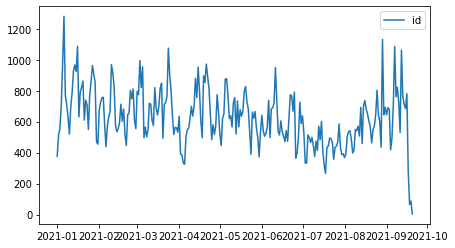

In [7]:
fig, ax = plt.subplots(figsize=(7,4))
counts = df.groupby(df.index.date)['id'].count().astype(int).to_frame()
counts.plot(ax=ax)

In [8]:
redo = True

if redo:

    import spacy
    nlp = spacy.load('de_core_news_sm')

    def lemmatize(doc):
        doc = nlp(doc)
        result = ' '.join([x.lemma_ for x in doc if not x.is_stop and not x.lemma_=="der"]) 
        return result

    df['clean_text'] = df.text.str.replace("(?:\@|https?\://)\S+", "").str.strip()
    df['clean_text'] = df.clean_text.str.replace("&amp;","")
    df['clean_text'] = df['clean_text'].apply(lemmatize)
    
    df.to_csv('source_data/lemmatized_tweets.csv',index=False)
    
else:
    
    df = pd.read_csv('source_data/lemmatized_tweets.csv',lineterminator='\n').dropna()
    
df.head()

id  \
created_at                                       
2021-01-01 00:00:56+00:00  1344795706700259329   
2021-01-01 00:02:04+00:00  1344795991002771456   
2021-01-01 00:03:28+00:00  1344796343877984256   
2021-01-01 00:07:06+00:00  1344797261461676033   
2021-01-01 00:08:39+00:00  1344797648688132096   

                                                                        text  \
created_at                                                                     
2021-01-01 00:00:56+00:00                  @kreischer_d @cducsubt Uğur Şahin   
2021-01-01 00:02:04+00:00              @mueller_sepp https://t.co/QkqccNfRg7   
2021-01-01 00:03:28+00:00  Alles Gute im neuen Jahr! Es kann nur besser w...   
2021-01-01 00:07:06+00:00  Einen guten Start ins neue Jahr. Wir haben vie...   
2021-01-01 00:08:39+00:00  Den Öko-Spießern, Klimahysterikern und #Covid-...   

                            author_id region   party parltype  \
created_at                                                      
2021-01-01 00:00:56+00:00    16361044   Bund  CDUCSU     Bund   
2021-01-01 00:02:04+00:00  2885729417   Bund  CDUCSU     Bund   
2021-01-01 00:03:28+00:00  2306519694   Bund  GRUENE     Bund   
2021-01-01 00:07:06+00:00    74837812   Bund   LINKE     Bund   
2021-01-01 00:08:39+00:00  2545743991   Bund     AFD     Bund   

                                                                  clean_text  
created_at                                                                    
2021-01-01 00:00:56+00:00                                         Uğur Şahin  
2021-01-01 00:02:04+00:00                                                     
2021-01-01 00:03:28+00:00                    alle Gute Jahr ! ich . Auf ’s !  
2021-01-01 00:07:06+00:00                       einer gut Start Jahr . ich .  
2021-01-01 00:08:39+00:00  Öko-Spießern , Klimahysterikern # Covid-Panike...

In [9]:
# 5 What hashtags are most commonly used

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
regex = r'\B(?!#[0-9_]+\b)(#\w{2,30})\b'

sub_df = df.reset_index()

vec =  CountVectorizer(min_df=1, token_pattern=regex)
X = vec.fit_transform(sub_df.text)
features = vec.get_feature_names()

hashtags = pd.DataFrame()
hashtags['hashtag'] = features

hashtags['total'] = np.array(X.sum(axis=0)).ravel()   

for p in df.party.unique():
    print('\n',p,'\n')
    idx = sub_df[sub_df.party==p].index
    fcounts = np.array(X[idx,:].sum(axis=0)).ravel()   
    hashtags[p] = fcounts
    sorted_counts = np.argsort(fcounts)
    for x in sorted_counts[-10:]:
        print(fcounts[x],features[x])


 CDUCSU 

96 #untersuchungsausschuss
105 #berlin
111 #cdupt21
169 #wegenmorgen
175 #scholz
199 #spd
211 #corona
222 #cdu
242 #bundestag
254 #wirecard

 GRUENE 

194 #allesistdrin
200 #btw21
224 #corona
243 #csu
243 #afghanistan
269 #bundestag
270 #bonn
327 #cdu
389 #laschet
413 #klimaschutz

 LINKE 

179 #bundesregierung
189 #cdurausausderregierung
193 #noafd
232 #afghanistan
238 #laschet
268 #linke
330 #bundestag
401 #cdu
503 #corona
561 #wirecard

 AFD 

152 #berlin
153 #bundesregierung
154 #deutschlandabernormal
178 #bundestag
190 #cdu
196 #thüringen
204 #merkel
210 #corona
218 #gera
908 #afd

 SPD 

87 #lobbyland
91 #klimaschutz
93 #csu
103 #wirecard
105 #triell
157 #corona
162 #bundestag
198 #laschet
225 #cdu
281 #spd

 FDP 

89 #mietendeckel
90 #lockdown
95 #berlin
111 #bpt21
117 #wirecard
119 #bundestag
120 #bundesregierung
162 #vielzutun
209 #fdp
285 #corona


In [10]:
# All hashtags
pd.options.display.max_rows = 999
hashtags.sort_values('total',ascending=False).head(500).to_csv('results/top_hashtags.csv',index=False)
hashtags.sort_values('total',ascending=False).head(10)

hashtag  total  CDUCSU  GRUENE  LINKE  AFD  SPD  FDP
2694        #corona   1590     211     224    503  210  157  285
2448           #cdu   1453     222     327    401  190  225   88
2176     #bundestag   1300     242     269    330  178  162  119
16079     #wirecard   1216     254     150    561   31  103  117
234            #afd   1096      46      27     25  908   56   34
8527       #laschet    999      58     389    238   68  198   48
13411          #spd    894     199     158    101   85  281   70
264    #afghanistan    744      82     243    232   51   77   59
7899   #klimaschutz    681      52     413     90    7   91   28
2817           #csu    628      28     243    136   55   93   73

In [11]:
# 5 What hashtags are most commonly used

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
regex = r'\b(?<!#)(\w{2,30})\b'

sub_df = df.reset_index()

vec =  TfidfVectorizer(min_df=1, token_pattern=regex,sublinear_tf=True)
vec =  CountVectorizer(min_df=1, token_pattern=regex)
term_X = vec.fit_transform(sub_df.clean_text)
term_features = vec.get_feature_names()

terms = pd.DataFrame()
terms['hashtag'] = term_features

terms['total'] = np.array(term_X.sum(axis=0)).ravel()   

for p in df.party.unique():
    print('\n',p,'\n')
    idx = sub_df[sub_df.party==p].index
    fcounts = np.array(term_X[idx,:].sum(axis=0)).ravel()   
    terms[p] = fcounts
    sorted_counts = np.argsort(fcounts)
    for x in sorted_counts[-10:]:
        print(fcounts[x],term_features[x])


 CDUCSU 

459 in
515 mit
520 jahr
548 cdu
615 mal
623 und
677 danken
693 heute
1139 mein
5361 ich

 GRUENE 

656 mal
727 klimaschutz
736 mensch
764 cdu
794 brauchen
832 danken
986 jahr
1055 und
1110 mein
5640 ich

 LINKE 

788 wirecard
798 cdu
842 in
957 mal
1003 aber
1009 jahr
1013 mensch
1023 und
1380 mein
7516 ich

 AFD 

381 wer
404 was
430 wenn
450 deutschland
485 jahr
504 mal
545 und
661 mein
1288 afd
3115 ich

 SPD 

588 danken
622 aber
651 sein
655 in
768 spd
840 jahr
857 mal
1070 mein
1081 und
6174 ich

 FDP 

620 und
634 mal
641 jahr
646 wenn
705 corona
880 fdp
904 danken
924 mein
1843 tb
6043 ich


In [12]:
terms.sort_values('total',ascending=False).head(500).to_csv('results/top_terms.csv',index=False)
terms.sort_values('total',ascending=False).head(10)

hashtag  total  CDUCSU  GRUENE  LINKE   AFD   SPD   FDP
40702     ich  33849    5361    5640   7516  3115  6174  6043
55369    mein   6284    1139    1110   1380   661  1070   924
85746     und   4947     623    1055   1023   545  1081   620
43703    jahr   4481     520     986   1009   485   840   641
53990     mal   4223     615     656    957   504   857   634
17747  danken   3692     677     832    536   155   588   904
55597  mensch   3477     387     736   1013   246   554   541
41671      in   3424     459     625    842   339   655   504
1587     aber   3351     374     515   1003   284   622   553
15966     cdu   3302     548     764    798   372   530   290

In [13]:
# 5 What hashtags are most commonly used

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
regex = r'\b(?<!#)(\w{2,30})\b'

sub_df = df.reset_index()

vec =  TfidfVectorizer(min_df=1, token_pattern=regex,sublinear_tf=True)
vec =  CountVectorizer(min_df=1, token_pattern=regex, ngram_range=(2,2))
bigram_X = vec.fit_transform(sub_df.clean_text)
bigram_features = vec.get_feature_names()

bigrams = pd.DataFrame()
bigrams['hashtag'] = bigram_features

bigrams['total'] = np.array(bigram_X.sum(axis=0)).ravel()   

for p in df.party.unique():
    print('\n',p,'\n')
    idx = sub_df[sub_df.party==p].index
    fcounts = np.array(bigram_X[idx,:].sum(axis=0)).ravel()   
    bigrams[p] = fcounts
    sorted_counts = np.argsort(fcounts)
    for x in sorted_counts[-10:]:
        print(fcounts[x],bigram_features[x])


 CDUCSU 

67 untersuchungsausschuss wirecard
73 ich wünsche
76 mindestens impfen
82 ich mal
88 ich finden
118 viel dank
134 olaf scholz
139 ich freuen
141 ich brauchen
241 herzliche glückwunsch

 GRUENE 

87 armin laschet
89 ich finden
93 alle gute
97 olaf scholz
101 viel dank
118 csu spd
195 ich freuen
291 cdu csu
302 herzliche glückwunsch
320 ich brauchen

 LINKE 

85 ich mal
91 ich glauben
92 de masi
108 corona krise
120 herzliche glückwunsch
121 ich freuen
157 cdu csu
174 die linke
179 ich finden
220 ich brauchen

 AFD 

51 ich mal
55 viel dank
57 berlin bundestag
59 meine anfrage
59 anfrage bundesregierung
62 wirholendasdirektmandat gera
63 deutschlandabernormal wirholendasdirektmandat
83 gera greiz
83 thüringen deutschlandabernormal
135 afd thüringen

 SPD 

68 of the
70 ich mal
81 olaf scholz
95 buongiorno franke
104 viel dank
110 ich finden
115 cdu csu
132 ich brauchen
136 ich freuen
294 herzliche glückwunsch

 FDP 

83 danken sich
84 danken meinung
95 freie demokrat
107 danke

In [14]:
bigrams.sort_values('total',ascending=False).head(500).to_csv('results/top_bigrams.csv',index=False)
bigrams.sort_values('total',ascending=False).head(50)

hashtag  total  CDUCSU  GRUENE  LINKE  AFD  SPD  FDP
278866  herzliche glückwunsch   1148     241     302    120   31  294  160
292296           ich brauchen   1070     141     320    220   34  132  223
293441             ich freuen    741     139     195    121   31  136  119
114545                cdu csu    720      44     291    157   44  115   69
640250              viel dank    626     118     101     81   55  104  167
293322             ich finden    557      88      89    179   26  110   65
455701            olaf scholz    420     134      97     57   10   81   41
295135                ich mal    415      82      51     85   51   70   76
376908             letzt jahr    302      38      77     62   32   43   50
293809            ich glauben    300      30      38     91   32   52   57
45845           armin laschet    281      56      87     32   13   68   25
298250            ich wünsche    277      73      48     57   22   55   22
279558            heute abend    273      38      74     60   15   31   55
295208               ich mein    270      51      38     45   46   40   50
62139       baden württemberg    263      24      46     33   11   34  115
292570             ich denken    256      49      42     72   16   43   34
698506           zum beispiel    247      45      57     35   21   51   38
26140               alle gute    240      33      93     27    4   61   22
296889             ich stehen    235      50      44     33   24   57   27
294176             ich hoffen    231      41      34     51   17   47   41
665883               wenn ich    223      29      27     47   46   35   39
121186        corona pandemie    223      41      49     49    5   35   44
121012           corona krise    222      16      28    108    7   20   43
294245                ich ich    218      45      20     33   34   44   42
298044               ich weiß    213      37      31     59   23   41   22
296578              ich sehen    213      43      25     50   16   52   27
293377            ich fordern    205      12      51     61   14   15   52
293967                ich hab    203      36      44     67    7   32   17
127839             danken ich    203      20      36     13    9   18  107
292249            ich bleiben    202      37      22     39   20   52   32
510834         sachsen anhalt    198      30      25     26   36   40   41
164031            einfach mal    197      44      23     42   21   36   31
640289          viel erfolgen    197      41      46     43    5   36   26
91                     00 uhr    196      23      25     38   27   25   58
4149                  20 jahr    196      22      47     58   26   27   16
8074                   30 uhr    193      34      54     40    8   30   27
265021           guten morgen    186      33      50     21   20   44   18
298173             ich wissen    186      31      31     32   25   32   35
128185            danken sich    185      18      38     18    0   28   83
294568             ich kennen    180      38      20     47   17   34   24
292820            ich einfach    180      29      29     35   20   33   34
453143                 of the    179      27      24     37    2   68   21
128013            danken mein    178      42      44     27    6   38   21
142425              die linke    177       1       0    174    2    0    0
266976              haben ich    175      29      19     32   23   32   40
139661     deutsche bundestag    175      50      28     17   24   30   26
278855         herzliche dank    174      61      38     17    3   24   31
414736           million euro    172      28      40     48   20   16   20
2803                  16 jahr    172      11      84     33   17   11   16
297725          ich verstehen    168      19      23     44   14   35   33

In [15]:
term_topics = pd.read_excel('data/woerter_und_hashtags_v3.xlsx')
term_topics.head()

hashtag           topic Unnamed: 2
0  bundestag  politik-intern        NaN
1     corona          corona        NaN
2        cdu        parteien        NaN
3     danken    zusammenhalt        NaN
4        afd        parteien        NaN

In [16]:
topics = []
for topic, group in term_topics.groupby('topic'):
    topics.append(topic)
    df[topic]=0
    cloc = df.columns.get_loc(topic)
    for term in group.hashtag.unique():
        term = str(term)
        if "#" in term:
            x = X
            feat = features
        else:
            x = term_X
            feat = term_features
            term_id = np.argwhere(np.array(feat)==term).ravel()
            idx = x[:,term_id].nonzero()[0] 
            df.iloc[idx,cloc] = 1

In [17]:
topic_ds = [
    {"name":"digitales","keywords":[
        "digital\w* *bildung",
        "digital\w* *verwaltung",
        "^(?=.*5g)(?!.*(impf|covid|pandemie|corona)).*",
        "automatisier(en|t|ung)",
        "digitale\w* *\w*ämt"
    ]},
    {"name":"verkehr","keywords": ["^(?=.*auto)(?!.*matisier).*",]},
    {"name": "arbeit", "keywords": ["beruf(?!en)"]},
    {"name": "außenpolitik", "keywords": ["vereint\w* *nationen","(?<!ent)rüstung"]},
    {"name": "familien", "keywords": ["^(?=.*familien)(?!.*(angehörige|opfer)).*"]},
    {"name": "wohnen", "keywords": ["bauen\W*bauen\W*bauen"]},
    {"name": "gewalt", "keywords": ["^(?=.*gewalt)(?!.*(vierte|dritte)).*"]}
]
topic_names = []
redo = True
for t in topic_ds:
    print(t)
    if t["name"] not in topics:
        topics.append(t["name"])
    for term in t["keywords"]:
        df.loc[df['text'].str.lower().str.contains(term.lower()),t["name"]] = 1

df.head()

{'name': 'digitales', 'keywords': ['digital\\w* *bildung', 'digital\\w* *verwaltung', '^(?=.*5g)(?!.*(impf|covid|pandemie|corona)).*', 'automatisier(en|t|ung)', 'digitale\\w* *\\w*ämt']}


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


{'name': 'verkehr', 'keywords': ['^(?=.*auto)(?!.*matisier).*']}
{'name': 'arbeit', 'keywords': ['beruf(?!en)']}
{'name': 'außenpolitik', 'keywords': ['vereint\\w* *nationen', '(?<!ent)rüstung']}
{'name': 'familien', 'keywords': ['^(?=.*familien)(?!.*(angehörige|opfer)).*']}
{'name': 'wohnen', 'keywords': ['bauen\\W*bauen\\W*bauen']}
{'name': 'gewalt', 'keywords': ['^(?=.*gewalt)(?!.*(vierte|dritte)).*']}


id  \
created_at                                       
2021-01-01 00:00:56+00:00  1344795706700259329   
2021-01-01 00:02:04+00:00  1344795991002771456   
2021-01-01 00:03:28+00:00  1344796343877984256   
2021-01-01 00:07:06+00:00  1344797261461676033   
2021-01-01 00:08:39+00:00  1344797648688132096   

                                                                        text  \
created_at                                                                     
2021-01-01 00:00:56+00:00                  @kreischer_d @cducsubt Uğur Şahin   
2021-01-01 00:02:04+00:00              @mueller_sepp https://t.co/QkqccNfRg7   
2021-01-01 00:03:28+00:00  Alles Gute im neuen Jahr! Es kann nur besser w...   
2021-01-01 00:07:06+00:00  Einen guten Start ins neue Jahr. Wir haben vie...   
2021-01-01 00:08:39+00:00  Den Öko-Spießern, Klimahysterikern und #Covid-...   

                            author_id region   party parltype  \
created_at                                                      
2021-01-01 00:00:56+00:00    16361044   Bund  CDUCSU     Bund   
2021-01-01 00:02:04+00:00  2885729417   Bund  CDUCSU     Bund   
2021-01-01 00:03:28+00:00  2306519694   Bund  GRUENE     Bund   
2021-01-01 00:07:06+00:00    74837812   Bund   LINKE     Bund   
2021-01-01 00:08:39+00:00  2545743991   Bund     AFD     Bund   

                                                                  clean_text  \
created_at                                                                     
2021-01-01 00:00:56+00:00                                         Uğur Şahin   
2021-01-01 00:02:04+00:00                                                      
2021-01-01 00:03:28+00:00                    alle Gute Jahr ! ich . Auf ’s !   
2021-01-01 00:07:06+00:00                       einer gut Start Jahr . ich .   
2021-01-01 00:08:39+00:00  Öko-Spießern , Klimahysterikern # Covid-Panike...   

                           0  ?  agrar  ...  sozialpolitik  staat  verkehr  \
created_at                              ...                                  
2021-01-01 00:00:56+00:00  0  0      0  ...              0      0        0   
2021-01-01 00:02:04+00:00  0  0      0  ...              0      0        0   
2021-01-01 00:03:28+00:00  0  0      0  ...              0      0        0   
2021-01-01 00:07:06+00:00  0  0      0  ...              0      0        0   
2021-01-01 00:08:39+00:00  0  0      0  ...              0      0        0   

                           wahlen  wirtschaft  wissenschaft  wohnen  zukunft  \
created_at                                                                     
2021-01-01 00:00:56+00:00       0           0             0       0        0   
2021-01-01 00:02:04+00:00       0           0             0       0        0   
2021-01-01 00:03:28+00:00       0           0             0       0        0   
2021-01-01 00:07:06+00:00       0           0             0       0        0   
2021-01-01 00:08:39+00:00       0           0             0       0        0   

                           zusammenhalt  familien  
created_at                                         
2021-01-01 00:00:56+00:00             0       NaN  
2021-01-01 00:02:04+00:00             0       NaN  
2021-01-01 00:03:28+00:00             0       NaN  
2021-01-01 00:07:06+00:00             0       NaN  
2021-01-01 00:08:39+00:00             0       NaN  

[5 rows x 51 columns]

In [18]:
df.to_csv('source_data/ht_term_annotated_tweets.csv',index=False)

In [19]:
cdict = {'afd': '#009EE0',
 'bp': None,
 'cducsu': '#000000',
 'dp': None,
 'drp': None,
 'dzp': None,
 'fdp': '#FFED00',
 'fraktionslos': None,
 'gb/bhe': None,
 'gruene': '#64A12D',
 'kpd': None,
 'linke': '#8C3473',
 'other': None,
 'parteilos': None,
 'pds': None,
 'spd': '#EB001F',
 'wav': None}

In [20]:
if type(df.index) == pd.core.indexes.numeric.Int64Index:
    df_times = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/all_tweets.csv',lineterminator='\n')
    df_times['created_at'] = pd.to_datetime(df_times['created_at'])
    df = df.merge(df_times[['id','created_at']])
    df = df.set_index("created_at")
    
df.head()

id  \
created_at                                       
2021-01-01 00:00:56+00:00  1344795706700259329   
2021-01-01 00:02:04+00:00  1344795991002771456   
2021-01-01 00:03:28+00:00  1344796343877984256   
2021-01-01 00:07:06+00:00  1344797261461676033   
2021-01-01 00:08:39+00:00  1344797648688132096   

                                                                        text  \
created_at                                                                     
2021-01-01 00:00:56+00:00                  @kreischer_d @cducsubt Uğur Şahin   
2021-01-01 00:02:04+00:00              @mueller_sepp https://t.co/QkqccNfRg7   
2021-01-01 00:03:28+00:00  Alles Gute im neuen Jahr! Es kann nur besser w...   
2021-01-01 00:07:06+00:00  Einen guten Start ins neue Jahr. Wir haben vie...   
2021-01-01 00:08:39+00:00  Den Öko-Spießern, Klimahysterikern und #Covid-...   

                            author_id region   party parltype  \
created_at                                                      
2021-01-01 00:00:56+00:00    16361044   Bund  CDUCSU     Bund   
2021-01-01 00:02:04+00:00  2885729417   Bund  CDUCSU     Bund   
2021-01-01 00:03:28+00:00  2306519694   Bund  GRUENE     Bund   
2021-01-01 00:07:06+00:00    74837812   Bund   LINKE     Bund   
2021-01-01 00:08:39+00:00  2545743991   Bund     AFD     Bund   

                                                                  clean_text  \
created_at                                                                     
2021-01-01 00:00:56+00:00                                         Uğur Şahin   
2021-01-01 00:02:04+00:00                                                      
2021-01-01 00:03:28+00:00                    alle Gute Jahr ! ich . Auf ’s !   
2021-01-01 00:07:06+00:00                       einer gut Start Jahr . ich .   
2021-01-01 00:08:39+00:00  Öko-Spießern , Klimahysterikern # Covid-Panike...   

                           0  ?  agrar  ...  sozialpolitik  staat  verkehr  \
created_at                              ...                                  
2021-01-01 00:00:56+00:00  0  0      0  ...              0      0        0   
2021-01-01 00:02:04+00:00  0  0      0  ...              0      0        0   
2021-01-01 00:03:28+00:00  0  0      0  ...              0      0        0   
2021-01-01 00:07:06+00:00  0  0      0  ...              0      0        0   
2021-01-01 00:08:39+00:00  0  0      0  ...              0      0        0   

                           wahlen  wirtschaft  wissenschaft  wohnen  zukunft  \
created_at                                                                     
2021-01-01 00:00:56+00:00       0           0             0       0        0   
2021-01-01 00:02:04+00:00       0           0             0       0        0   
2021-01-01 00:03:28+00:00       0           0             0       0        0   
2021-01-01 00:07:06+00:00       0           0             0       0        0   
2021-01-01 00:08:39+00:00       0           0             0       0        0   

                           zusammenhalt  familien  
created_at                                         
2021-01-01 00:00:56+00:00             0       NaN  
2021-01-01 00:02:04+00:00             0       NaN  
2021-01-01 00:03:28+00:00             0       NaN  
2021-01-01 00:07:06+00:00             0       NaN  
2021-01-01 00:08:39+00:00             0       NaN  

[5 rows x 51 columns]

0
mentioned  7944  times


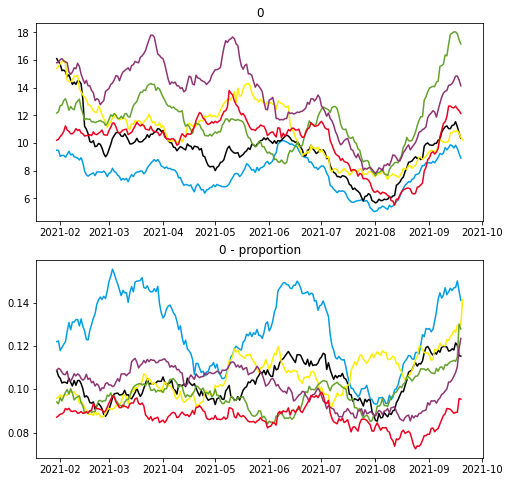

?
mentioned  7944  times


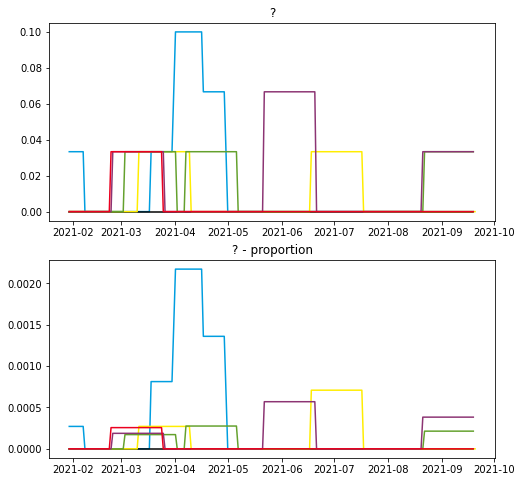

agrar
mentioned  7944  times


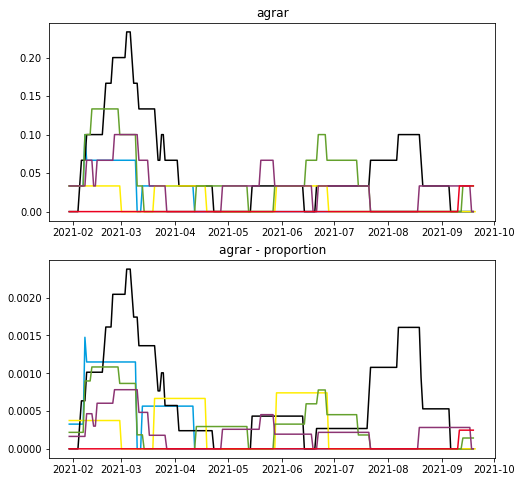

arbeit
mentioned  7944  times


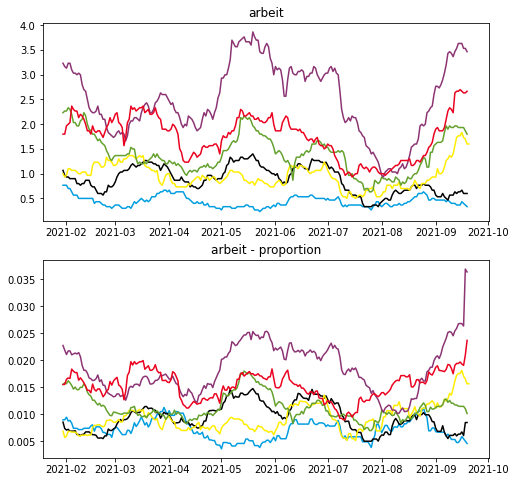

außenpolitik
mentioned  7944  times


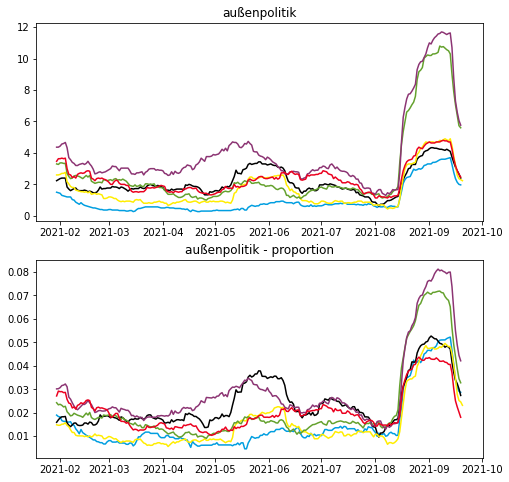

bildung
mentioned  7944  times


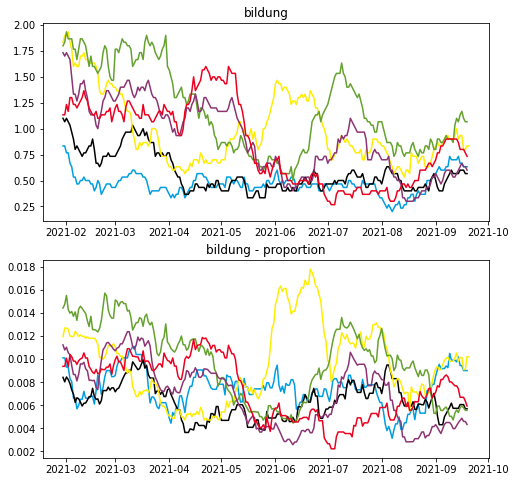

bürokratie
mentioned  7944  times


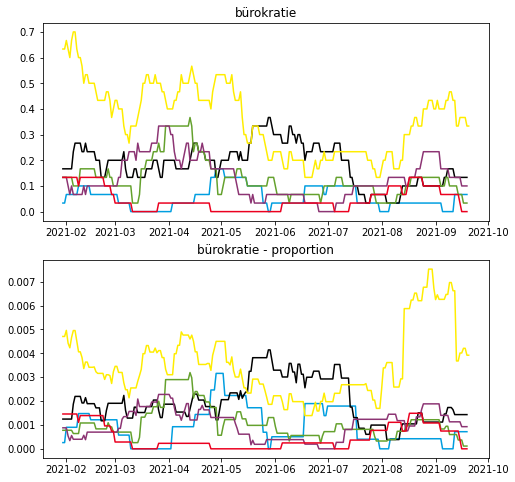

corona
mentioned  7944  times


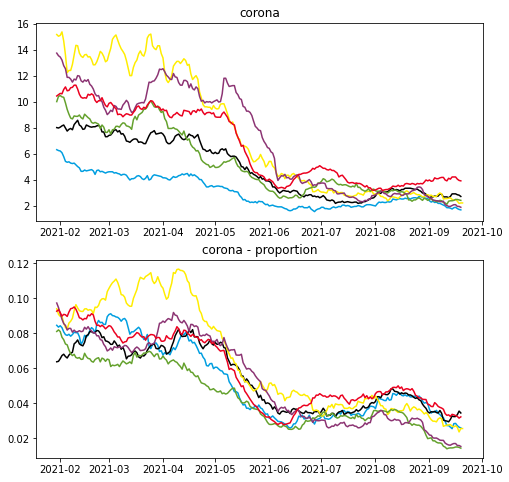

debatte
mentioned  7944  times


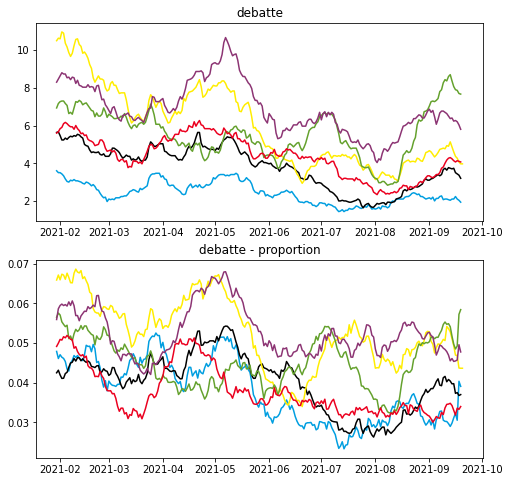

digitales
mentioned  7944  times


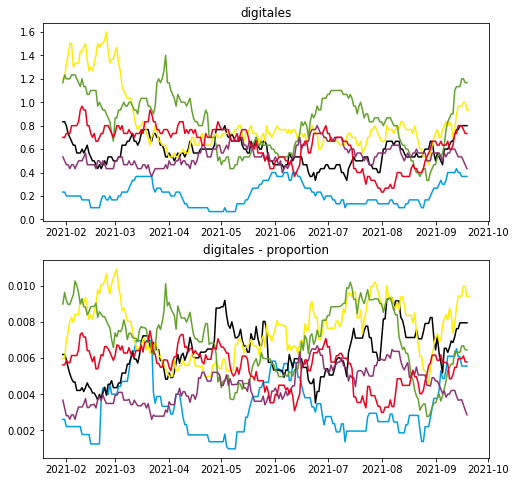

diskriminierung
mentioned  7944  times


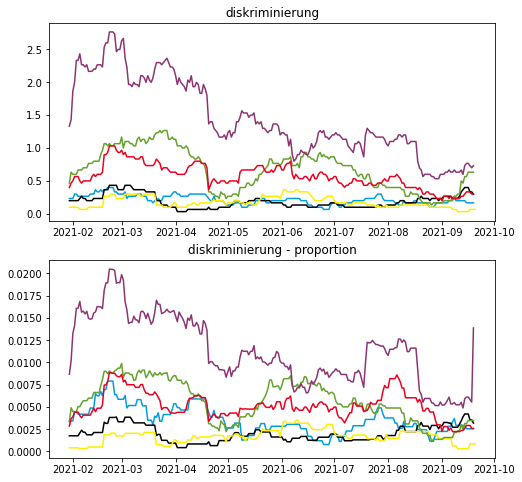

einfamilienhaus
mentioned  7944  times


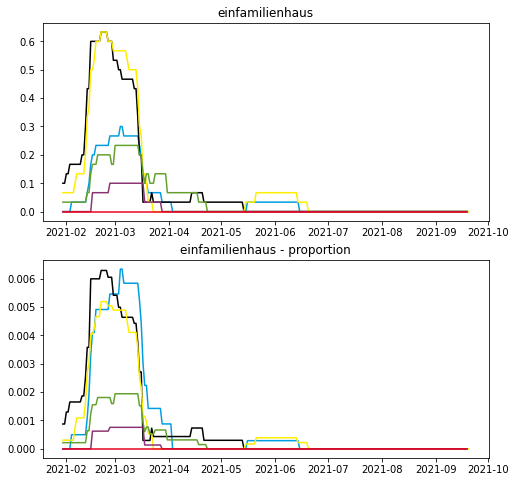

emotion
mentioned  7944  times


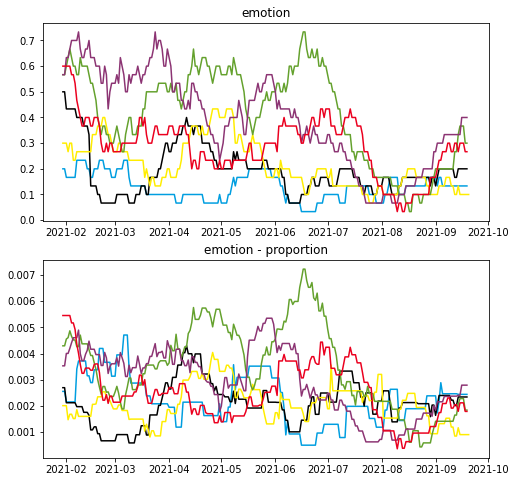

engagement
mentioned  7944  times


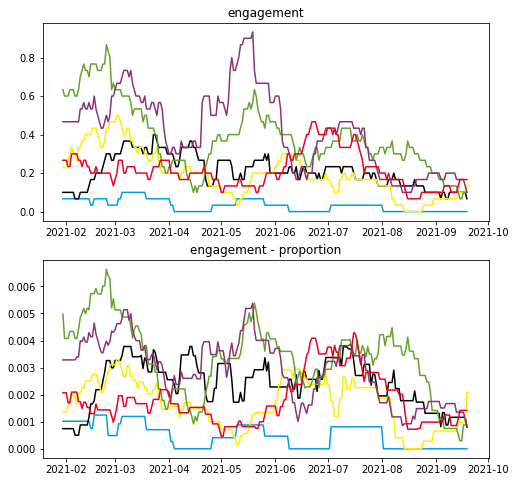

erinnerung
mentioned  7944  times


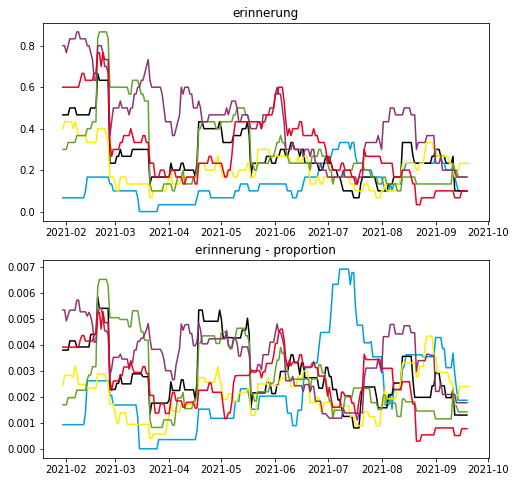

europa
mentioned  7944  times


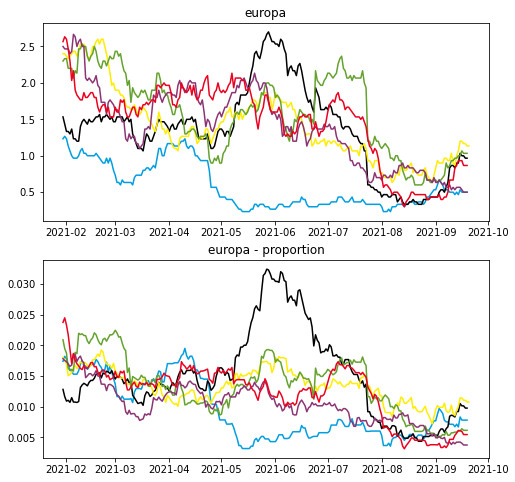

familie
mentioned  7944  times


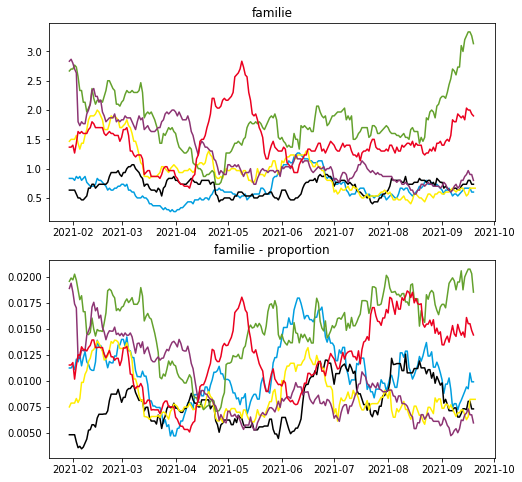

freiheit
mentioned  7944  times


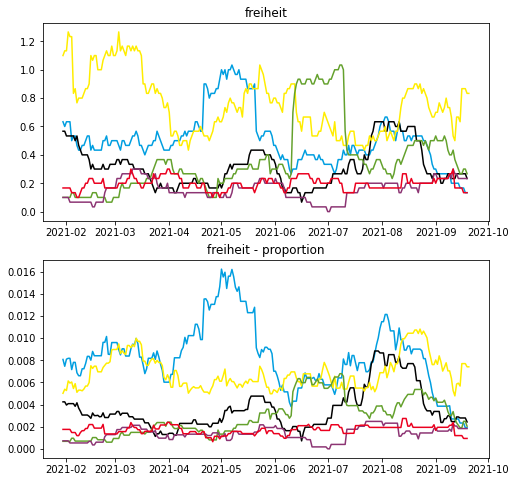

gesellschaft
mentioned  7944  times


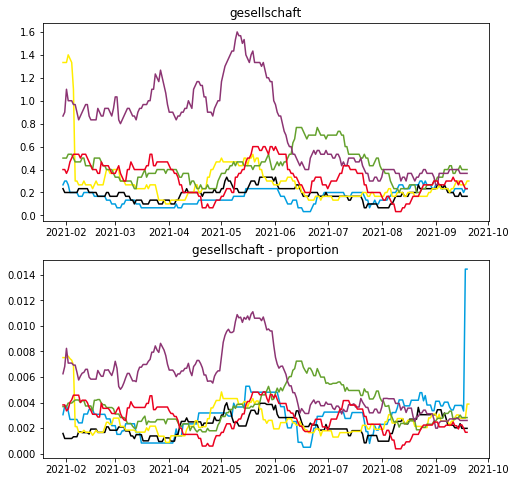

gewalt
mentioned  7944  times


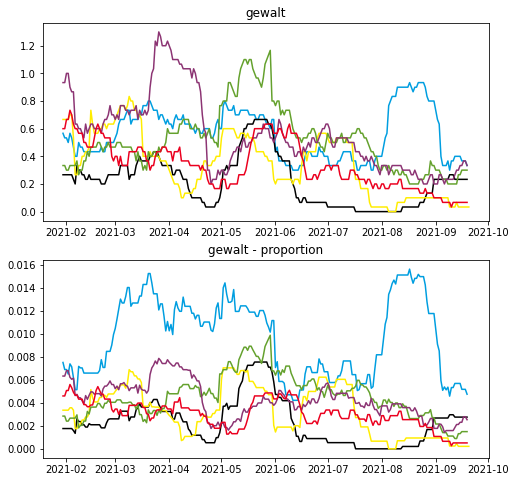

gleichberechtigung
mentioned  7944  times


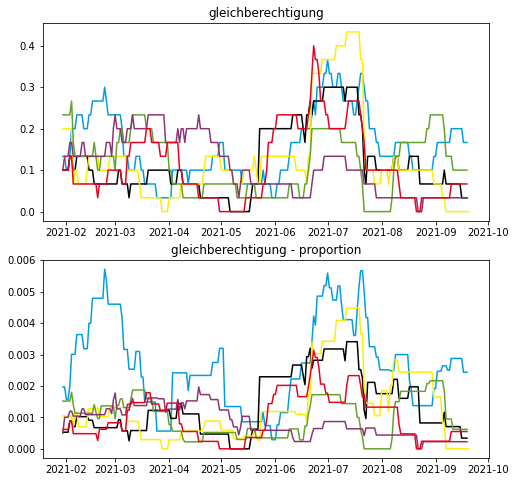

internationales
mentioned  7944  times


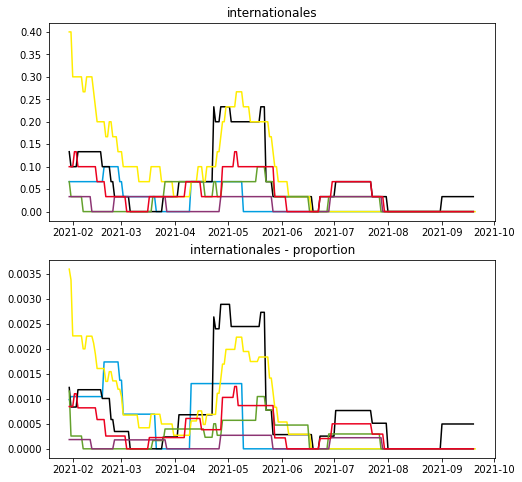

klima
mentioned  7944  times


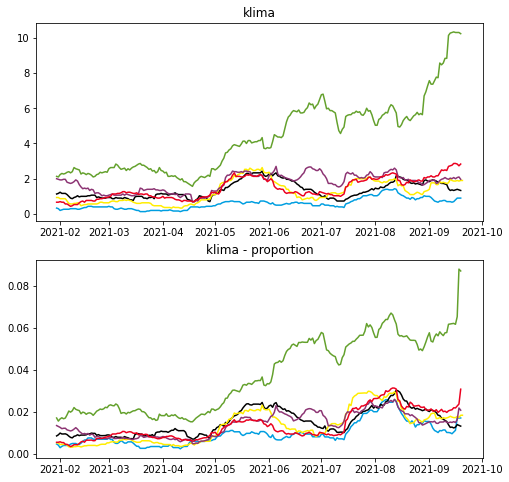

korruption
mentioned  7944  times


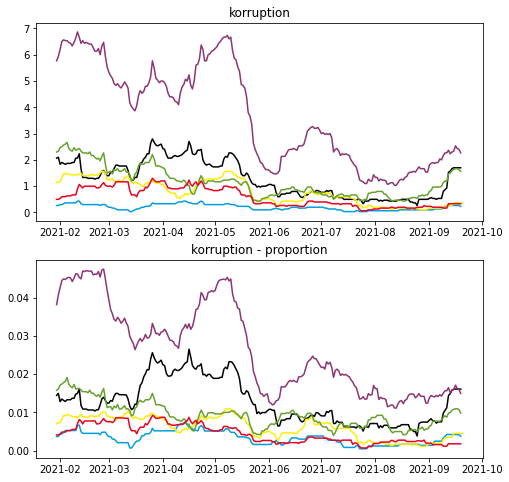

medien
mentioned  7944  times


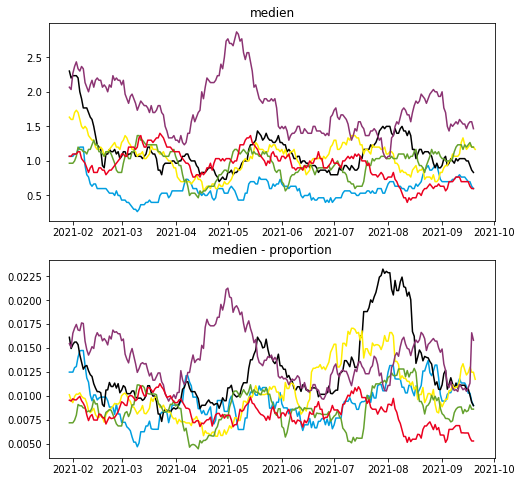

menschenrechte
mentioned  7944  times


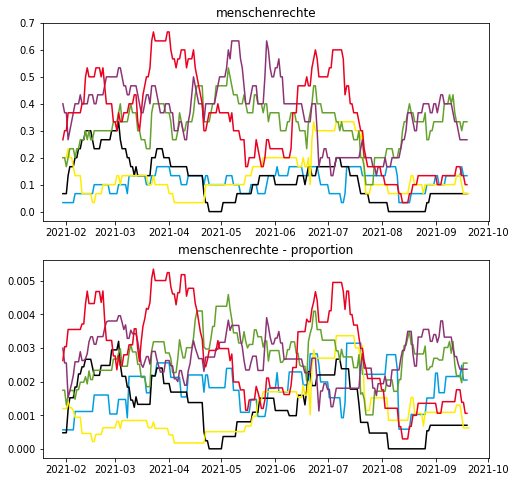

migration
mentioned  7944  times


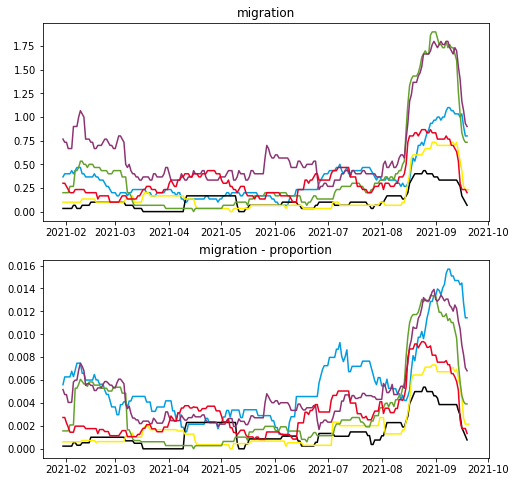

parteien
mentioned  7944  times


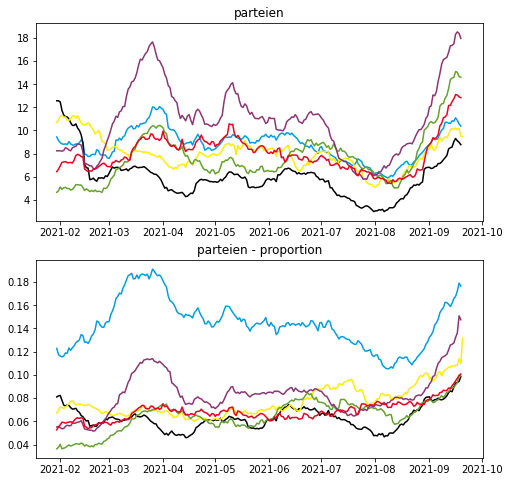

politik-intern
mentioned  7944  times


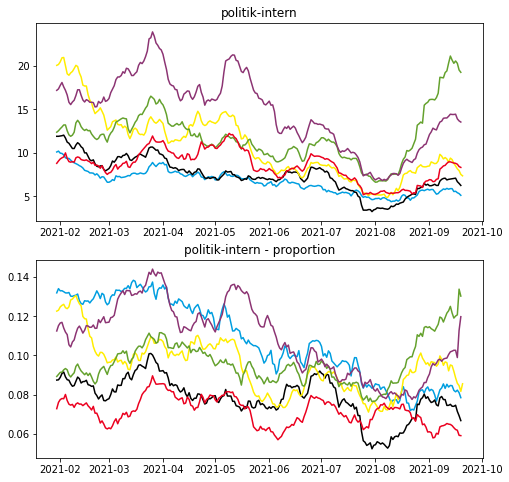

politiker
mentioned  7944  times


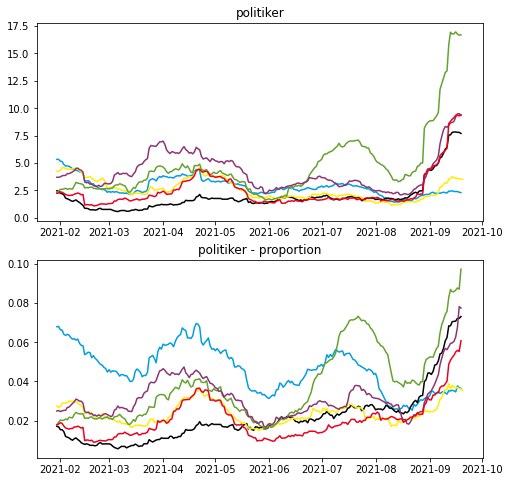

recht
mentioned  7944  times


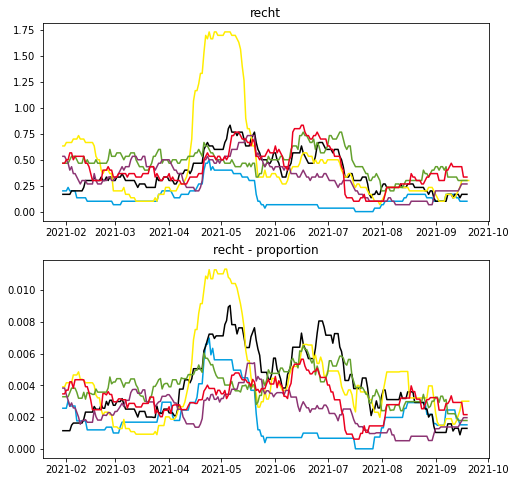

religion
mentioned  7944  times


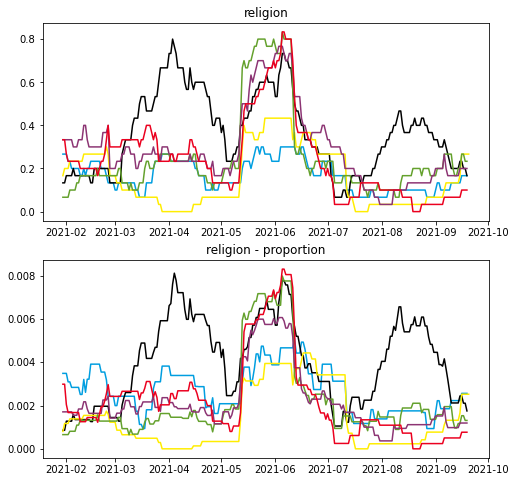

rente
mentioned  7944  times


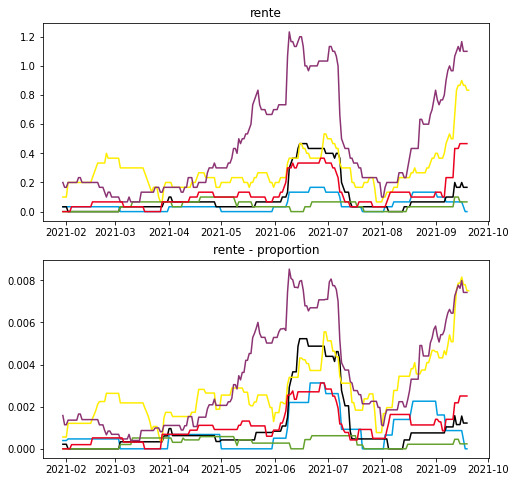

sicherheit
mentioned  7944  times


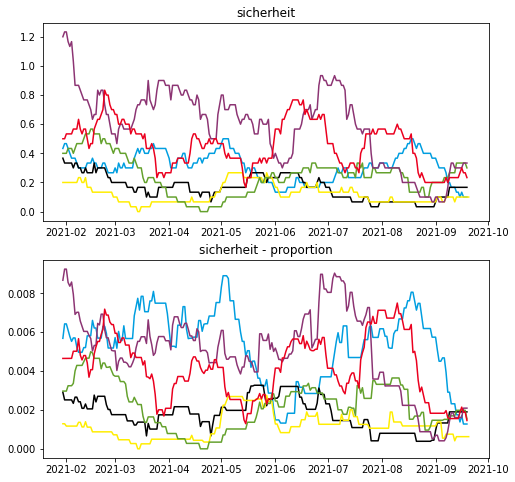

sozialpolitik
mentioned  7944  times


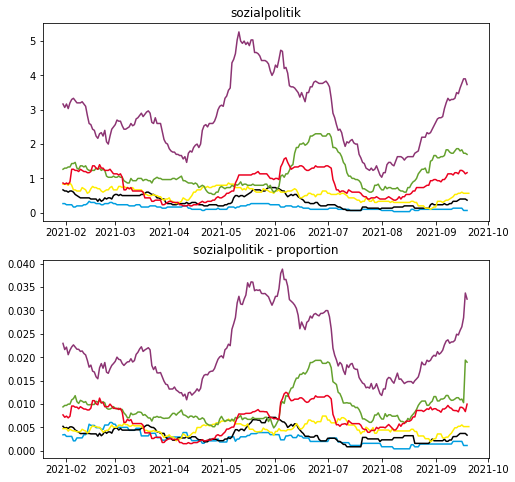

staat
mentioned  7944  times


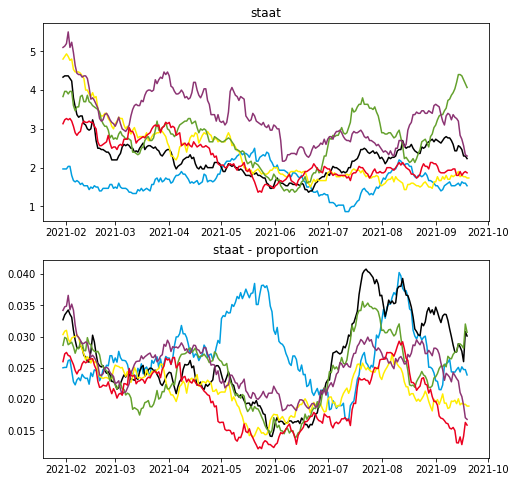

verkehr
mentioned  7944  times


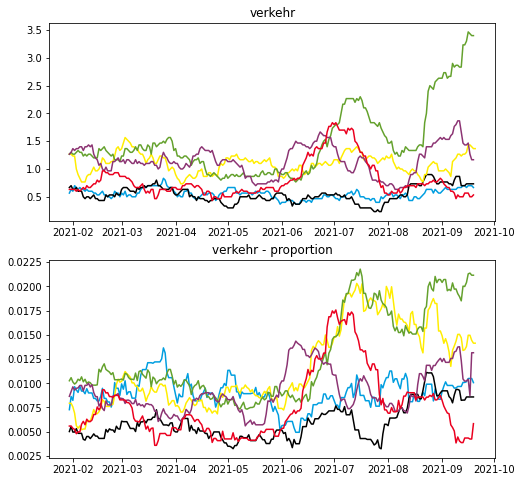

wahlen
mentioned  7944  times


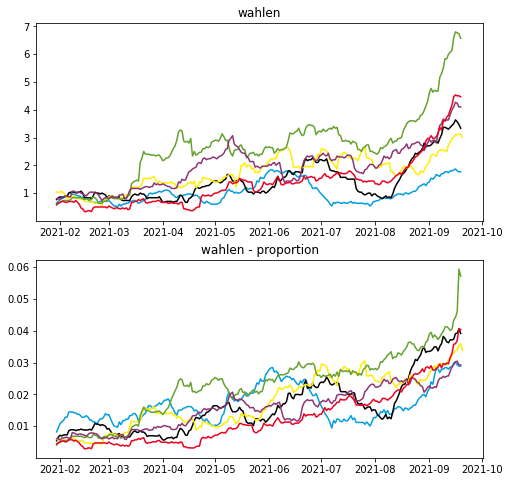

wirtschaft
mentioned  7944  times


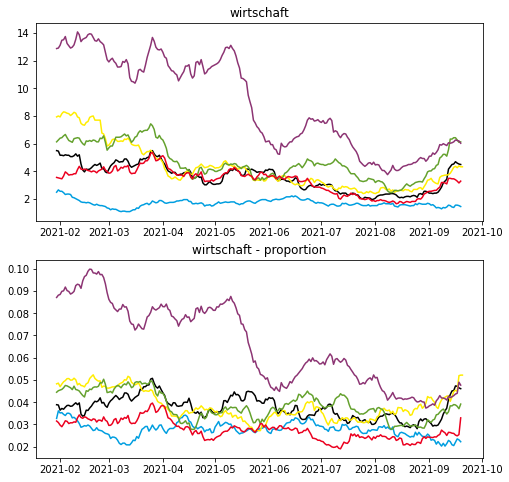

wissenschaft
mentioned  7944  times


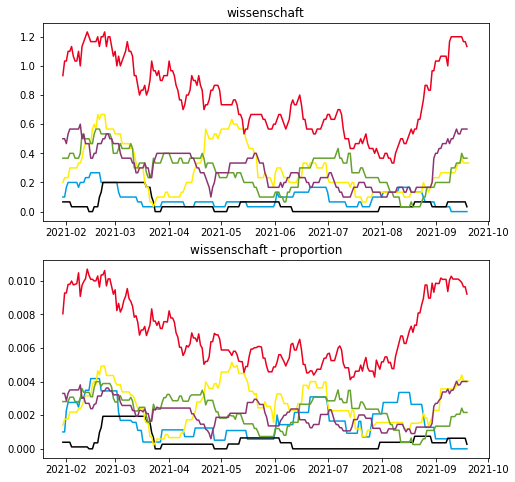

wohnen
mentioned  7944  times


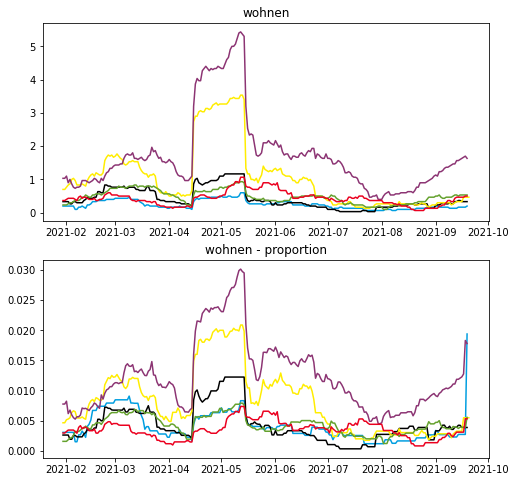

zukunft
mentioned  7944  times


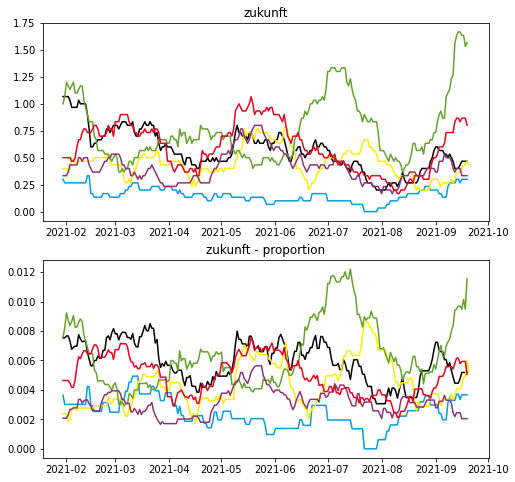

zusammenhalt
mentioned  7944  times


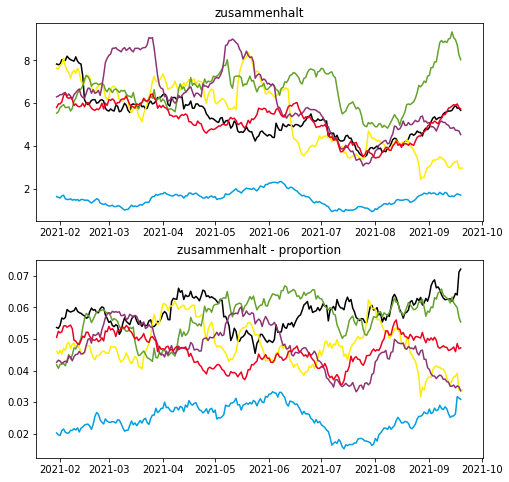

familien
mentioned  7944  times


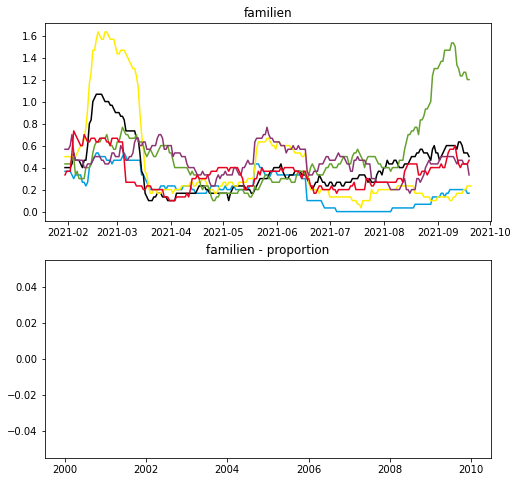

In [21]:


for j,c in enumerate(topics):
    
    print(c)
    
    sub_df = df[df[topic]==1].reset_index()
    
    print("mentioned ", sub_df.shape[0], " times")
    if not os.path.isdir(f"results/{c}"):
        os.mkdir(f"results/{c}")
        
    regex = r'\B(?!#[0-9_]+\b)(#\w{2,30})\b'
    
    vec =  CountVectorizer(min_df=1, token_pattern=regex)
    X = vec.fit_transform(sub_df.text)
    features = vec.get_feature_names()

    hashtags = pd.DataFrame()
    hashtags['hashtag'] = features

    hashtags['total'] = np.array(X.sum(axis=0)).ravel()   

    for p in df.party.unique():
        idx = sub_df[sub_df.party==p].index
        fcounts = np.array(X[idx,:].sum(axis=0)).ravel()   
        hashtags[p] = fcounts
        sorted_counts = np.argsort(fcounts)
            
    hashtags.sort_values('total',ascending=False).head(500).to_csv(f'results/{c}/top_hashtags.csv',index=False)
    
    regex = r'\b(?<!#)(\w{2,30})\b'

    vec =  CountVectorizer(min_df=1, token_pattern=regex)
    term_X = vec.fit_transform(sub_df.clean_text)
    term_features = vec.get_feature_names()

    terms = pd.DataFrame()
    terms['hashtag'] = term_features

    terms['total'] = np.array(term_X.sum(axis=0)).ravel()   

    for p in df.party.unique():
        idx = sub_df[sub_df.party==p].index
        fcounts = np.array(term_X[idx,:].sum(axis=0)).ravel()   
        terms[p] = fcounts
        sorted_counts = np.argsort(fcounts)
    
    terms.sort_values('total',ascending=False).head(500).to_csv(f'results/{c}/top_terms.csv',index=False)
    
    fig, axs = plt.subplots(2, figsize=(8,8))
    
    count_df = pd.DataFrame()

    ax = axs[0]
    for party, group in df.groupby('party'):
        counts = group.groupby(group.index.date)[c].sum()
        counts = counts.rolling(30).mean()
        count_df = count_df.merge(counts.to_frame(party),left_index=True, right_index=True,how="outer")
        ax.plot(counts, color=cdict[party.lower()])
        
    ax.set_title(c)
    
    ax = axs[1]
    for party, group in df.groupby('party'):
        counts = group.groupby(group.index.date)[c].sum() / group.groupby(group.index.date)[c].count()
        counts = counts.rolling(30).mean()
        count_df = count_df.merge(counts.to_frame(f"{party} - norm"),left_index=True, right_index=True,how="outer")
        ax.plot(counts, color=cdict[party.lower()])
        
    ax.set_title(f"{c} - proportion")
    
    plt.savefig(f"results/{c}/topic_over_time.png",bbox_inches="tight")
    count_df.to_csv(f"results/{c}/counts.csv")
    
    plt.show()


In [22]:
ignore_topics = [
    "politik-intern","debatte","emotion","einfamilienhaus",
    "parteien","politiker","staat","zukunft","0","?"
]

results = []
for j,c in enumerate(topics):
    if c in ignore_topics:
        continue
    topic_sum = df[c].sum()
    for party, pgroup in df.groupby('party'):
    
        results.append({
            "party":party,"topic":c,"n":pgroup[c].sum(),"topic_sum":topic_sum,
            "party_sum": pgroup.shape[0]
        })

topic_sums = pd.DataFrame.from_dict(results).sort_values('topic_sum').reset_index(drop=True)
topic_sums.to_csv('results/topic_sums.csv',index=False)
topic_sums.head()

party  topic     n  topic_sum  party_sum
0     FDP  agrar   3.0       38.0      28787
1     SPD  agrar   1.0       38.0      30116
2   LINKE  agrar   8.0       38.0      33925
3     AFD  agrar   4.0       38.0      16327
4  CDUCSU  agrar  13.0       38.0      24783

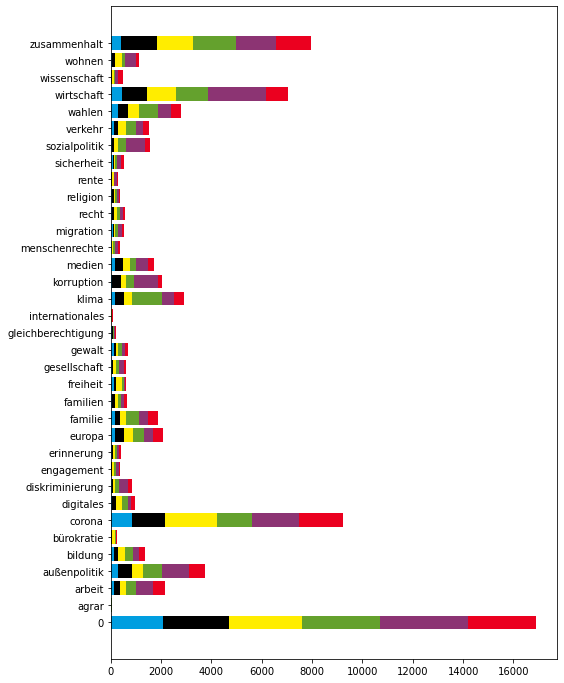

In [23]:
fig, ax = plt.subplots(figsize=(8,12))

ticks = []
for i, (name, group) in enumerate(topic_sums.groupby("topic")):
    left = 0
    for party, pgroup in group.groupby('party'):
        x = pgroup.n.values[0]
        ax.barh(i,x,color=cdict[party.lower()], left=left)
        left+=x
    ticks.append(name)
        
ax.set_yticks(range(len(ticks)))
ax.set_yticklabels(ticks)

plt.show()

AttributeError: 'Int64Index' object has no attribute 'date'

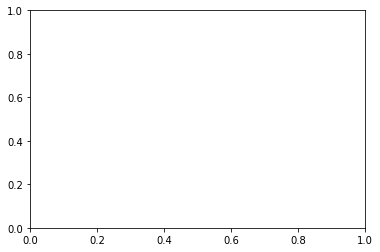

In [24]:
sub_topics = ["klima","corona","wahlen"]

fig, ax = plt.subplots()

count_df = pd.DataFrame()

for c in sub_topics:
    counts = group.groupby(group.index.date)[c].sum()
    counts = counts.rolling(30).mean()
    count_df = count_df.merge(counts.to_frame(c),left_index=True, right_index=True,how="outer")
    ax.plot(counts, label=c)
    
ax.legend()

count_df.to_csv('results/comparison.csv')

plt.show()

In [ ]:
cases = pd.read_excel('data/Fallzahlen_Kum_Tab.xlsx',sheet_name="BL_7-Tage-Fallzahlen (fixiert)",skiprows=2)
cases = cases.rename(columns={"Unnamed: 0":"Land"})
cases = cases[cases["Land"]=="Gesamt"]

cases = cases[cases.columns[1:]].melt(var_name="date")

cases.head()

In [ ]:
cases.columns[1:]

In [ ]:
cases.tail()